<a href="https://colab.research.google.com/github/koizachek/TeachingFine_Tuning/blob/main/UebungFUZuFo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Fine-Tuning von LLMs
## 1. Datenaufbereitung
Vorab: Erstellt eine Kopie dieses Notebooks und legt es in EUREM drive ab. erlaubt dem Notebook Access zu eurem Drive (Icon list links, der Ordner mit dem Dreieck)

1.1 Euch liegen Daten in Form einer Excel Tabelle vor, die ihr in eine CSV mit 2 Spalten formatiert habt, einem Prompt und einer Completion:  

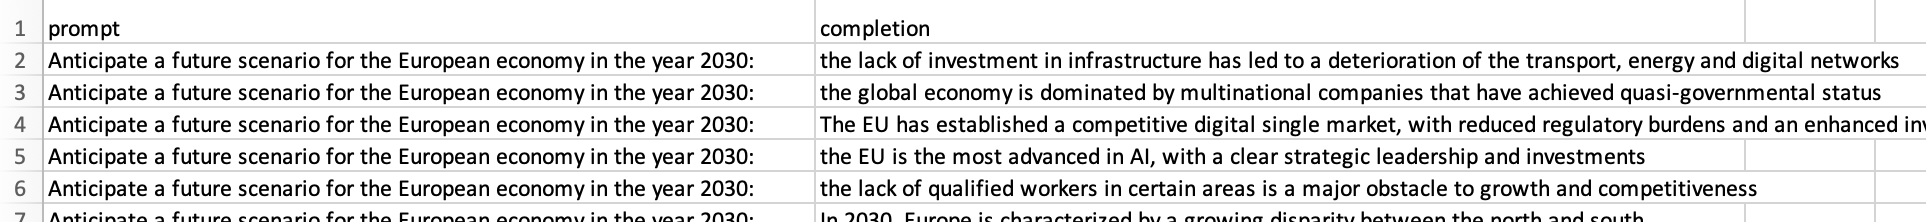

sample daten: https://github.com/koizachek/TeachingFine_Tuning/tree/main/data

In [1]:
#Importiert zunächst die wichtigsten Libraries
import csv #damit die csv gelesen werden kann - wenn noch nicht installiert: !pip install csv/json
import json #damit wir sie in Lernmaterial für das Sprachmodell konvertieren können

1. 2 Geht nun auf den Inhaltsreiter links (drei Linien und punkte), im Ordner solltet ihr eure CSV abgelegt haben. Die Ablage der Datei ist vorraussetzung, um folgende Operation durchzuführen:

In [ ]:
#diese funktion liest die csv ein und wandelt sie in eine JSONL um, die meisten Sprachmodelle
#brauchen dieses Format für das Training.

def csv_to_jsonl(csv_file, jsonl_file):
    with open(csv_file, 'r', encoding='utf-8-sig') as file:
        reader = csv.DictReader(file, delimiter=';')
        header = [column.strip('\ufeff') for column in reader.fieldnames]  # Remove from column names
        print(header)  # Debugging: Print the header row
        with open(jsonl_file, 'w') as outfile:
            for row in reader:
                prompt = row['prompt']
                completion = row['completion']
                item = {"prompt": prompt, "completion": completion}
                json.dump(item, outfile)
                outfile.write('\n')

    print(f"Conversion completed. JSONL file saved as '{jsonl_file}'.")

1. 3 Ihr drückt auf den Play Button in eurer Codezeile. Sollte etwas noch nicht installiert sein, importiert ihr die Libraries neu mithilfe der Befehle, die in dem Klammern stehen

In [ ]:
csv_file = "/content/allgpttofine.csv" #hier kommt eure eigene datei rein, inclusive path
jsonl_file = 'allgpt_readytofinetune.jsonl' #hier kommt der name eurer datei hin
csv_to_jsonl(csv_file, jsonl_file)

['prompt', 'completion']
Conversion completed. JSONL file saved as 'allgpt_readytofinetune.jsonl'.


1. 4 Ihr ladet eure jsonl runter.

##Fine-Tuning mit Cohere

Cohere ist kostenlos und Opensource. https://dashboard.cohere.ai/welcome einfach anmelden.

(Nach der Präse gehts weiter)

In [2]:
!pip install cohere #installiert cohere lokal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 997.3 kB/s eta 0:00:00
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [3]:
import cohere

In [16]:
co = cohere.Client(' __Your_OWN_KEY__') #Dein TrialAPIkey

In [ ]:
response = co.generate(

  model='____DEINE___MODEL___ID',

  prompt='Anticipate a scenario on European Education in 2030')

print(format(response.generations[0].text))

#Wenn mehrere Szenarien gleichzeitig generiert werden sollen, nehmt ihr folgenden code:

Note: Mit dem kostenlosen Key erhaltet ihr nur 5 API Aufrufe pro Minute. Wenn ihr mehr zur selben Zeit generieren wollt, ist ein Upgrade nötig.

In [ ]:
prompt = 'Anticipate a scenario on European Education in 2030'

# leere liste für die outputs
output_list = []

# Generiere zB 10 outputs
for _ in range(10):
    response = co.generate(
        model='____DEINE___MODEL___ID',
        prompt=prompt
    )
    output_list.append(response.generations[0].text)

# Print the list of outputs
for output in output_list:
    print(format(output))

#um direkt mehrere Prompts zu generieren UND mehrere Szenarien zu generieren:


In [ ]:
#initialize eine Liste pro Keyword, output, jahr und prompt

years_list = []
topics_list = []
prompts_list = []
scenarios_list = []

In [ ]:
for topic in topics:
    for year in years:
        for _ in range(5):
            Prompt = generate_prompt(topic, year)
            Output = generate_scenario(Prompt)
            years_list.append(year)
            topics_list.append(topic)
            prompts_list.append(Prompt)
            scenarios_list.append(scenario)

um die Szenarien zu Speichern:

In [17]:
import csv

In [ ]:
# CSV file Name
csv_file = 'output_data.csv'

# eine spalte für den prompt, einen für den output schreiben
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Prompt', 'Output'])
    for output in output_list:
        writer.writerow([prompt, output])

print(f'Die CSV file "{csv_file}" wurde erstellt.') #wird geprinted, wenn es erfolgreich war.